In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')


In [29]:
#uploading path of dataset from directory
dataset = pd.read_csv('/content/stock market.csv')
dataset.head()


,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,03-01-2022,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0.0
1,04-01-2022,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0.0
2,05-01-2022,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0.0
3,06-01-2022,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0.0
4,07-01-2022,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0.0


In [30]:
dataset.shape


(3006, 1285)

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3006 entries, 0 to 3005
Columns: 1285 entries, date to TARGET
dtypes: float64(606), int64(2), object(677)
memory usage: 29.5+ MB


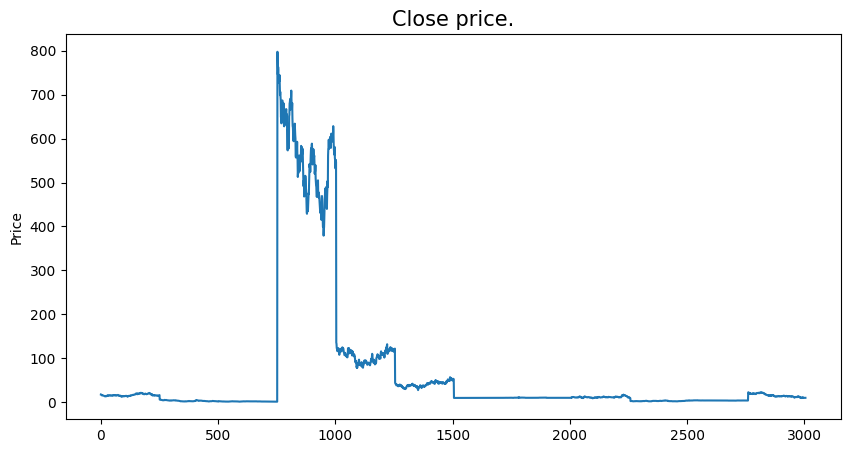

In [32]:
plt.figure(figsize=(10,5))
plt.plot(dataset['close'])
plt.title('Close price.', fontsize=15)
plt.ylabel('Price')
plt.show()

In [33]:
dataset[dataset['close'] == dataset['adjclose']].shape

(2253, 1285)

In [34]:
dataset = dataset.drop(['adjclose'], axis=1)

In [35]:
dataset.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    284
volumenrelativo     216
diff                 56
INCREMENTO           56
TARGET                1
Length: 1284, dtype: int64

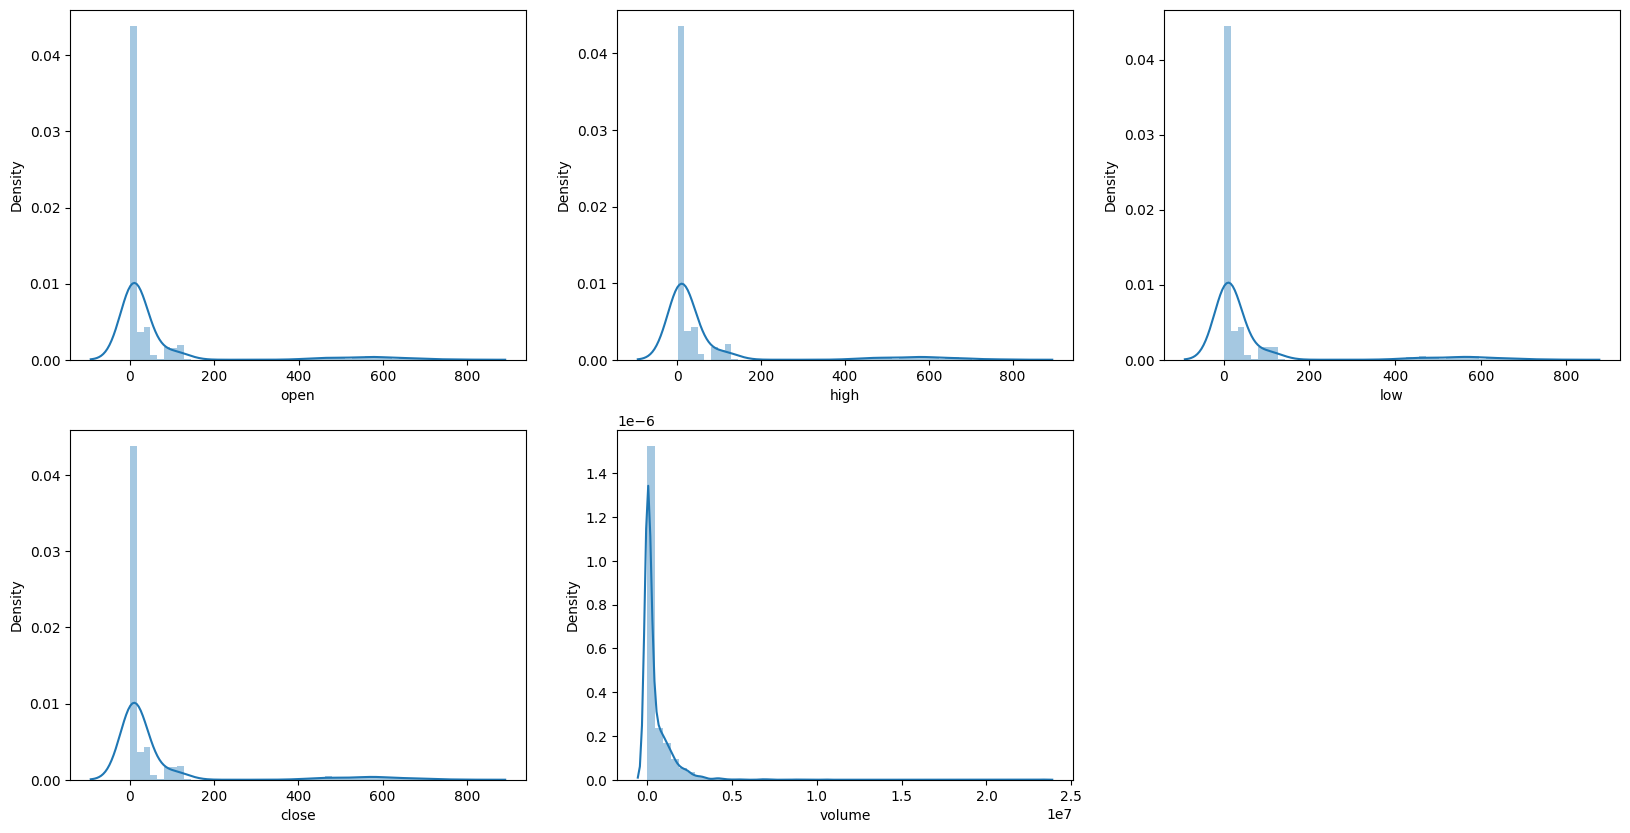

In [36]:
features = ['open', 'high', 'low', 'close', 'volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(dataset[col])
plt.show()

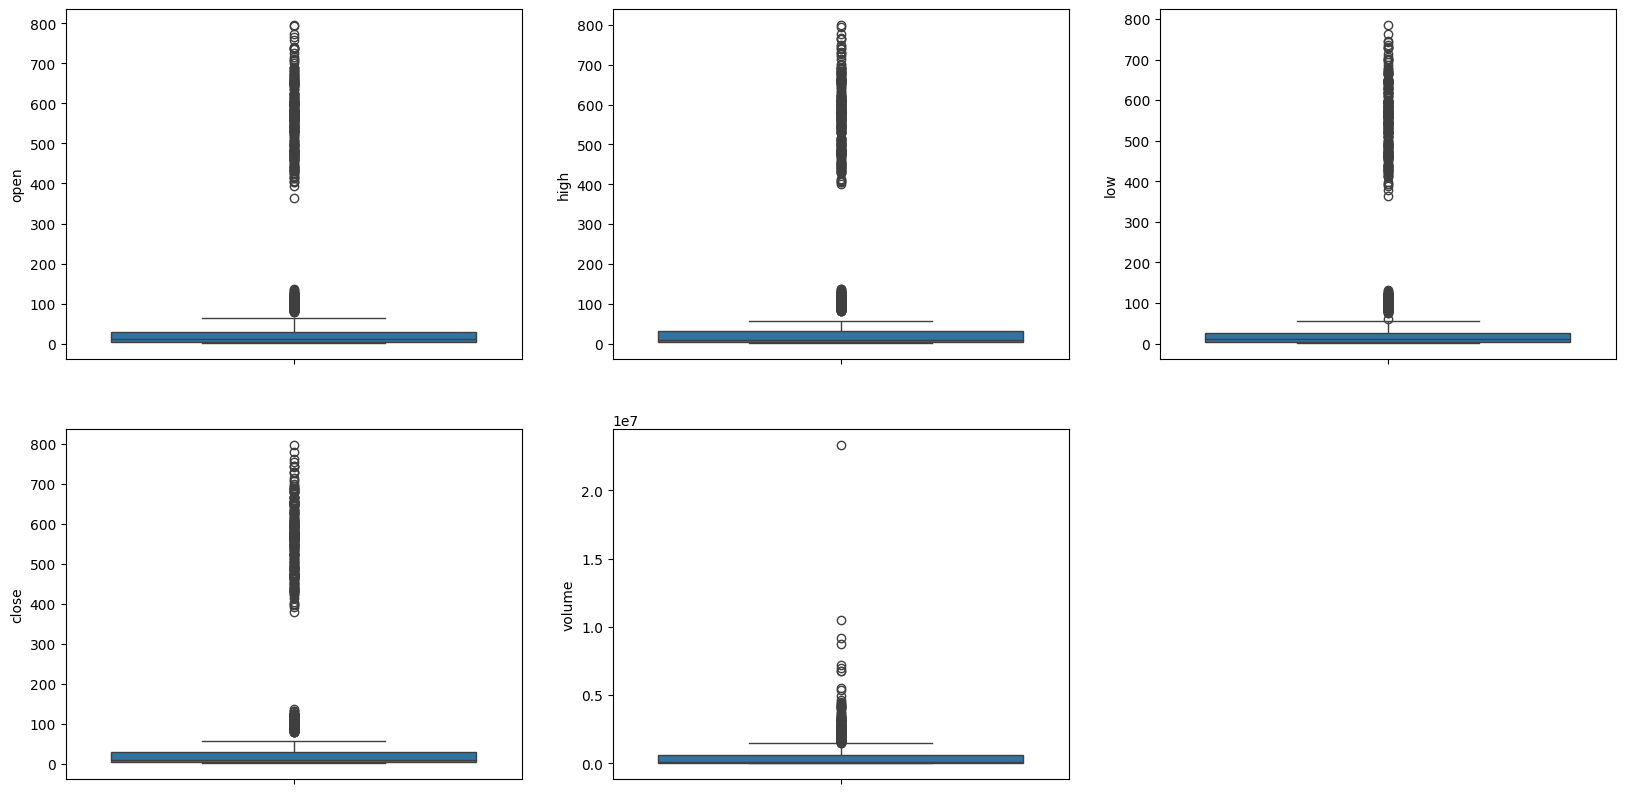

In [37]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(dataset[col])
plt.show()

In [38]:
def feature_engineering(data):
    data['Daily_Return'] = data['close'].pct_change()
    data['Rolling_Avg_Close'] = data['close'].rolling(window=20).mean()
    data = data.dropna()
    return data

In [39]:
dataset = feature_engineering(dataset)
dataset.head()

,date,open,high,low,close,volume,ticker,RSIadjclose15,RSIvolume15,RSIadjclose25,...,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET,Daily_Return,Rolling_Avg_Close
98,24-05-2022,13.81,14.120,13.61,14.10,74700,ASLE,47.575179,48.098729,46.186849,...,47.186159,57.142875,47.186159,9.956716,0.644521,-0.06,-0.423732,0.0,0.012931,13.9835
99,25-05-2022,14.10,14.320,14.05,14.18,71400,ASLE,48.459097,47.832464,46.721997,...,59.066871,70.707082,59.066871,11.640211,0.616048,0.21,1.503221,0.0,0.005674,13.9685
100,26-05-2022,14.12,14.347,13.79,13.82,89700,ASLE,44.815889,49.493682,44.641044,...,60.125065,52.525237,60.125065,-7.599827,0.773943,0.51,3.831707,0.0,-0.025388,13.9185
101,27-05-2022,14.01,14.250,13.94,14.11,84800,ASLE,48.178500,49.045623,46.635466,...,63.468005,67.171696,63.468005,3.703691,0.731665,0.06,0.427049,0.0,0.020984,13.9000
102,31-05-2022,14.14,14.140,13.53,13.86,315400,ASLE,45.611408,65.015137,45.174001,...,57.274855,52.127632,57.274855,-5.147223,2.721311,0.75,5.720824,1.0,-0.017718,13.8655


In [40]:
features = dataset[['Daily_Return', 'Rolling_Avg_Close','open', 'high', 'low', 'close','volume']]
target = dataset['TARGET']


In [41]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.18415409509283281


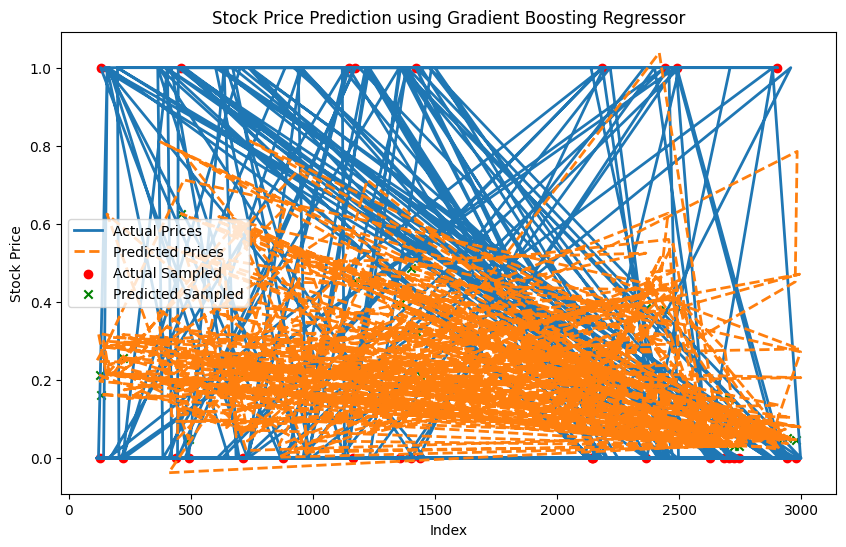

In [46]:
sample_size = 10
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Prices', linewidth=2)
plt.plot(y_test.index, predictions, label='Predicted Prices', linestyle='dashed', linewidth=2)

# Sample every 10th point for better visualization
plt.scatter(y_test.index[::sample_size], y_test.iloc[::sample_size], color='red', marker='o', label='Actual Sampled')
plt.scatter(y_test.index[::sample_size], predictions[::sample_size], color='green', marker='x', label='Predicted Sampled')

plt.title('Stock Price Prediction using Gradient Boosting Regressor')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

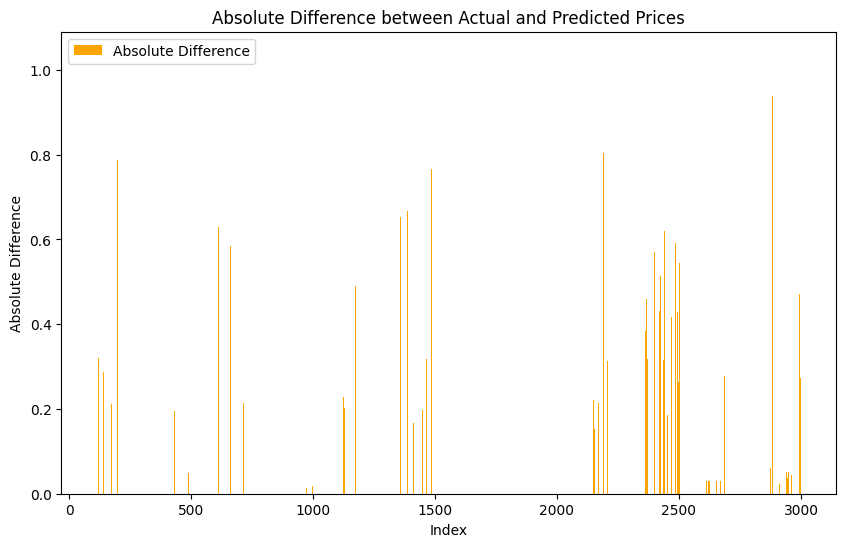

In [47]:
abs_diff = np.abs(y_test - predictions)

# Visualize the absolute differences using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(y_test.index, abs_diff, color='orange', label='Absolute Difference')
plt.title('Absolute Difference between Actual and Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.legend()
plt.show()

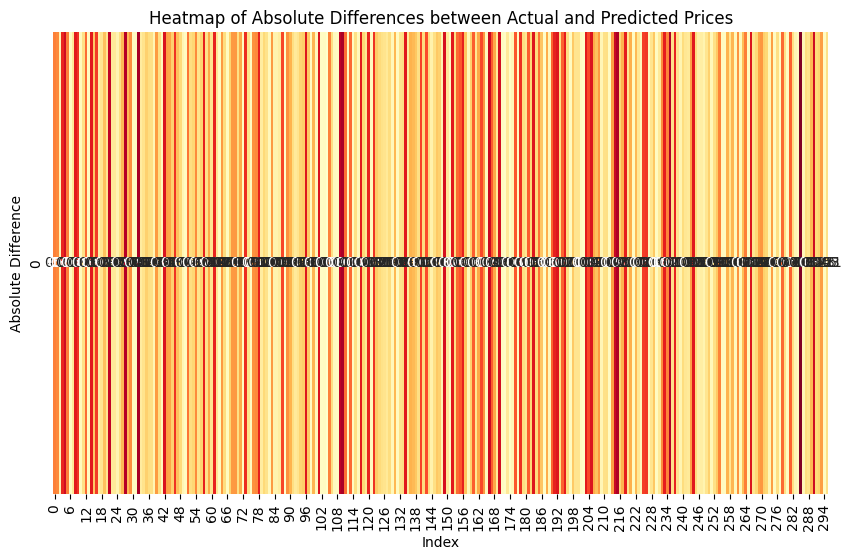

In [48]:
import seaborn as sns
abs_diff = np.abs(y_test - predictions)

# Create a heatmap for absolute differences
plt.figure(figsize=(10, 6))
sns.heatmap(abs_diff.values.reshape(1, -1), cmap='YlOrRd', annot=True, fmt='.2f', cbar=False)
plt.title('Heatmap of Absolute Differences between Actual and Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.show()